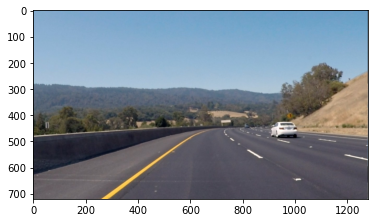

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

image = mpimg.imread('images/curved_lane.jpg')

plt.imshow(image)

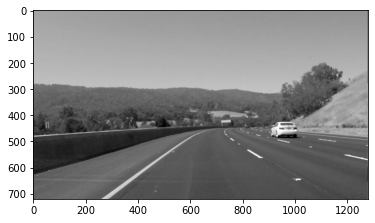

In [28]:
#Converting the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # use BGR2GRAY if you read the image using cv2.imread() instead of matplotlib.image.imread()
plt.imshow(gray,cmap='gray')


### High Pass filters

- Edge Detection
- Sobel Operators (First order derivatives
- Laplacian Opearators (Second order Derivatives

> Note : The Sum of the kernel should be 0

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.


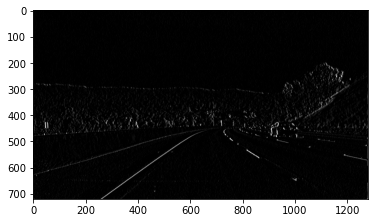

In [29]:
# Creating a sobel_x filter to detect vertical edges
sobel_x = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])

#Applying the filter
filtered_image_sobel_x = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image_sobel_x,cmap='gray')

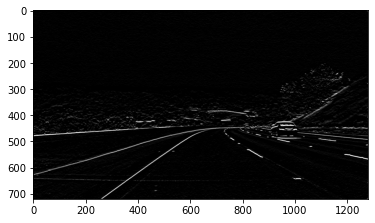

In [30]:
# Creating a sobel_y filter to detect vertical edges
sobel_y = np.array([[-1,-2,-1],
                   [0,0,0],
                   [1,2,1]])

#Applying the filter
filtered_image_sobel_y = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image_sobel_y,cmap='gray')

## Laplacian Filter 
- The laplacian edge detectors use only one kernel.
- Calculates second order derivatives in a single pass

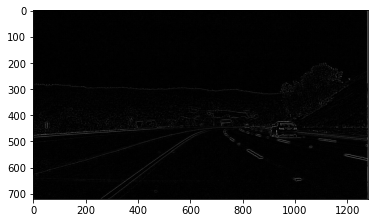

In [31]:
# Creating a laplacian filter(with diagonals) to detect vertical edges
laplacian_filter_with_diagonals = np.array([[1,1,1],
                                           [1,-8,1],
                                           [1,1,1]])

#Applying the filter
filtered_image_laplacian_filter_with_diagonals = cv2.filter2D(gray, -1, laplacian_filter_with_diagonals)

plt.imshow(filtered_image_laplacian_filter_with_diagonals,cmap='gray')

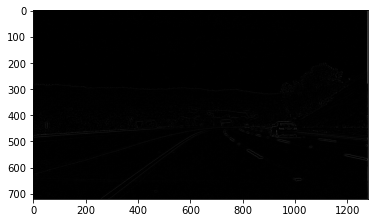

In [32]:
# Creating a laplacian filter to detect vertical edges
laplacian_filter = np.array([[0,1,0],
                           [1,-4,1],
                           [0,1,0]])

#Applying the filter
filtered_image_laplacian_filter = cv2.filter2D(gray, -1, laplacian_filter)

plt.imshow(filtered_image_laplacian_filter,cmap='gray')

## Binary images
- Helps to see the strong edges more clearly
- lower threshold values, more edges (But with noise, to avoid noise first pass the image through a blur filter aka low pass filter and then pass it to a high pass filter such as sobel)



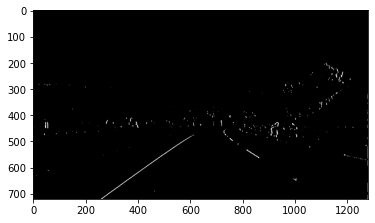

In [33]:
#Creating a binary image
retval, binary_image_sobel_x = cv2.threshold(filtered_image_sobel_x, 100, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image_sobel_x, cmap='gray')


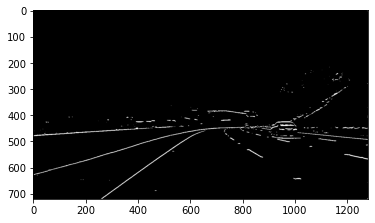

In [34]:
#Creating a binary image
retval, binary_image_sobel_y = cv2.threshold(filtered_image_sobel_y, 100, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image_sobel_y, cmap='gray')

In [35]:
sobel_x2 = np.square(sobel_x)
print(sobel_x2)

[[1 0 1]
 [4 0 4]
 [1 0 1]]


## Low Pass Filters
- Averaging pixel values
- Blur/Smooth an image
- Block high-frequency parts of an image
- low pass filters take an average unlike the high pass filter which take a difference
> Note : The Sum of the kernel components should add upto 1 


- An Gaussian Blur Filter
    - This filter tries to preserve the edges
    - Its like a weighted average giving most weightage to the center pixel with its surrounding pixels rather than the corner pixels


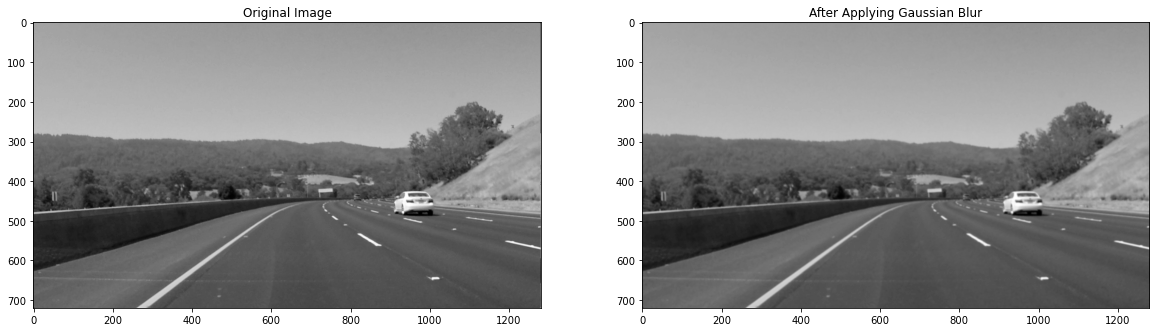

In [36]:
# Applying gaussian blur using CV
gray_blur = cv2.GaussianBlur(gray,(5,5),0) #(Image, kernel size, standard deviation)

f, (ax1,ax2) =plt.subplots(1,2, figsize=(20,10))

ax1.set_title('Original Image')
ax1.imshow(gray, cmap='gray')

ax2.set_title('After Applying Gaussian Blur')
ax2.imshow(gray_blur, cmap='gray')

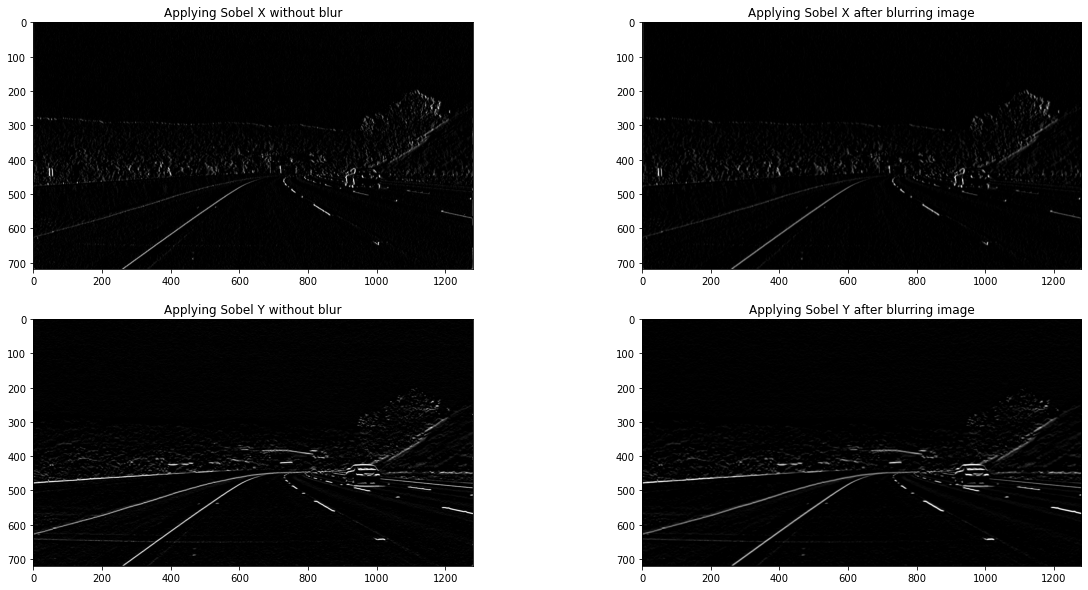

In [37]:
#Applying the filter on blurred image
filtered_image_sobel_x_blurred = cv2.filter2D(gray_blur, -1, sobel_x)
filtered_image_sobel_y_blurred = cv2.filter2D(gray_blur, -1, sobel_y)




f, axs =plt.subplots(2,2, figsize=(20,10))

axs[0][0].set_title('Applying Sobel X without blur')
axs[0][0].imshow(filtered_image_sobel_x, cmap='gray')

axs[0][1].set_title('Applying Sobel X after blurring image')
axs[0][1].imshow(filtered_image_sobel_x_blurred, cmap='gray')

axs[1][0].set_title('Applying Sobel Y without blur')
axs[1][0].imshow(filtered_image_sobel_y, cmap='gray')

axs[1][1].set_title('Applying Sobel Y after blurring image')
axs[1][1].imshow(filtered_image_sobel_y_blurred, cmap='gray')

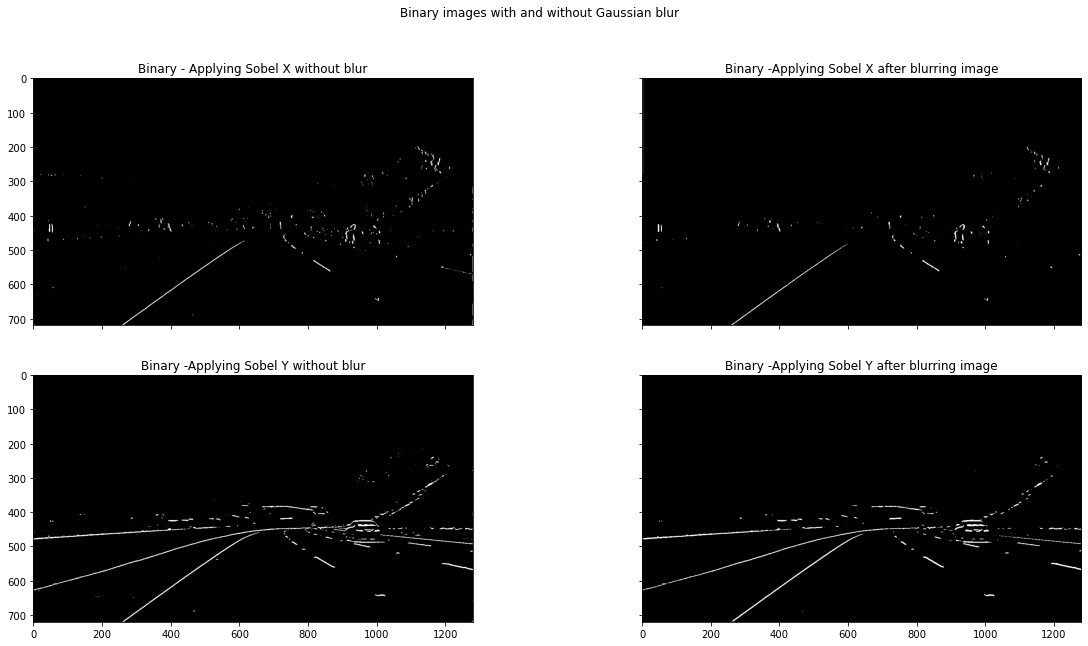

In [32]:
# Creating binary images after sobel operator without gaussian blur 
retval, binary_image_sobel_x = cv2.threshold(filtered_image_sobel_x, 100, 255, cv2.THRESH_BINARY)
retval, binary_image_sobel_y = cv2.threshold(filtered_image_sobel_y, 100, 255, cv2.THRESH_BINARY)

# Creating the binary images after applying gaussian blur and sobel operator
retval, binary_image_sobel_x_blurred = cv2.threshold(filtered_image_sobel_x_blurred, 100, 255, cv2.THRESH_BINARY)
retval, binary_image_sobel_y_blurred = cv2.threshold(filtered_image_sobel_y_blurred, 100, 255, cv2.THRESH_BINARY)



f, axs =plt.subplots(2,2, figsize=(20,10))
f.suptitle('Binary images with and without Gaussian blur')
axs[0][0].set_title('Binary - Applying Sobel X without blur')
axs[0][0].imshow(binary_image_sobel_x, cmap='gray')

axs[0][1].set_title('Binary -Applying Sobel X after blurring image')
axs[0][1].imshow(binary_image_sobel_x_blurred, cmap='gray')

axs[1][0].set_title('Binary -Applying Sobel Y without blur')
axs[1][0].imshow(binary_image_sobel_y, cmap='gray')

axs[1][1].set_title('Binary -Applying Sobel Y after blurring image')
axs[1][1].imshow(binary_image_sobel_y_blurred, cmap='gray')

for ax in f.get_axes():
    ax.label_outer()

There is much less noise in blurred images - This is due to Gaussian blur, as it averages teh pixel values, hence the noises aren't detected as edges in high pass filters like sobel  or Laplacial filters
- So the procedure would be
    1. Pass the image through a low pass filter(Gaussian Blur)
    2. Pass the image through a high pass filter(Sobel or Laplacian)
    3. Create Binary images for significant edge detection
    

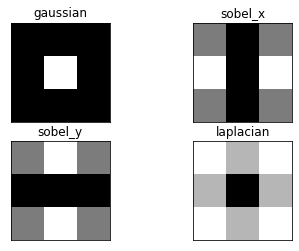

In [39]:
# Define gaussian, sobel, and laplacian (edge) filters

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian','sobel_x', \
                'sobel_y', 'laplacian']


# perform a fast fourier transform on each filter
# and create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# display 4 filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()